4) Uma rede de lojas de material de construção (CONSTRUCAO) que atua em 52 regiões
quer fazer um estudo sobre a quantidade vendida (qt_vend) de determinado tipo de
material. Como possíveis informações que poderiam ter alguma influência estão: gasto
com propaganda (gast_prop), número de contas ativas (n_cont), número de marcas
(n_marc), número de lojas na região (n_loj).

Faça uma regressão entre quantidade vendida e as demais variáveis.

In [7]:
%pip install statsmodels
%pip install stepwise-regression
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [8]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
Caminho = '/Users/fabicampanari/Desktop/1_Exam-Linear Regression/Construcao.xlsx'
df = pd.read_excel(Caminho)
df.head()

,qt_venda,gast_prop,n_cont,n_marc,n_loj
0,79.3,5.5,31,10,8
1,200.1,2.5,55,8,6
2,163.2,8.0,67,12,9
3,200.1,3.0,50,7,16
4,146.0,3.0,38,8,15


In [10]:

# Análise descritiva
# Estatísticas descritivas
print("Estatísticas Descritivas:\n", df.describe())



Estatísticas Descritivas:
          qt_venda  gast_prop     n_cont     n_marc      n_loj
count   52.000000  52.000000  52.000000  52.000000  52.000000
mean   170.221154   5.407692  51.846154   9.115385   9.884615
std     83.748911   1.813873  14.074570   2.556452   4.680598
min     30.600000   2.500000  26.000000   4.000000   3.000000
25%    100.275000   4.000000  40.000000   8.000000   6.000000
50%    159.800000   5.500000  51.500000   9.000000   9.000000
75%    223.325000   6.700000  62.000000  11.000000  14.000000
max    339.700000   9.000000  75.000000  13.000000  19.000000


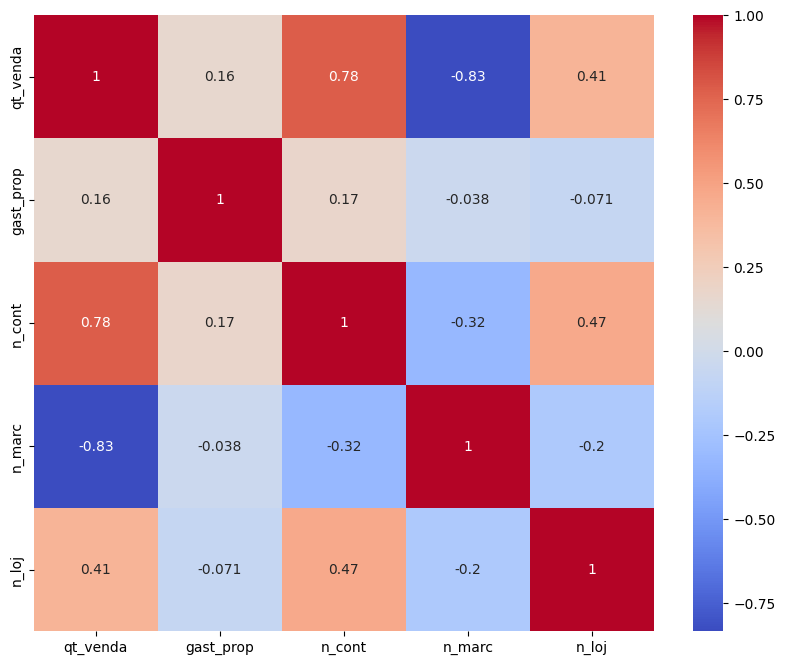

In [11]:
# Visualizar a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [14]:
# Ajustar o modelo de regressão linear
model = smf.ols('qt_venda ~ gast_prop + n_cont + n_marc + n_loj', data=df).fit()



In [15]:
# Resumo do modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               qt_venda   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.52e-45
Time:                        10:09:24   Log-Likelihood:                -185.83
No. Observations:                  52   AIC:                             381.7
Df Residuals:                      47   BIC:                             391.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    178.4976      8.656     20.621      0.0

In [16]:
# Análise dos resultados
# Correlação
correlation_matrix = df.corr()
print("Matriz de Correlação:\n", correlation_matrix)



Matriz de Correlação:
            qt_venda  gast_prop    n_cont    n_marc     n_loj
qt_venda   1.000000   0.158590  0.782750 -0.833102  0.407154
gast_prop  0.158590   1.000000  0.172551 -0.038252 -0.070565
n_cont     0.782750   0.172551  1.000000 -0.324288  0.468213
n_marc    -0.833102  -0.038252 -0.324288  1.000000 -0.202060
n_loj      0.407154  -0.070565  0.468213 -0.202060  1.000000


In [17]:
# Regressão
print("Coeficientes de Regressão:\n", model.params)



Coeficientes de Regressão:
 Intercept    178.497581
gast_prop      1.794307
n_cont         3.318975
n_marc       -21.198938
n_loj          0.321805
dtype: float64


In [18]:
# Intersecção
print("Intersecção:\n", model.params[0])



Intersecção:
 178.4975808749881


/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_19991/1197975307.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intersecção:\n", model.params[0])


In [19]:
# R-Múltiplo
print("R-Múltiplo:\n", model.rsquared)



R-Múltiplo:
 0.9891866418507362


In [20]:
# R-Quadrado
print("R-Quadrado:\n", model.rsquared_adj)



R-Quadrado:
 0.9882663560507989


In [21]:
# ANOVA - Teste F
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA - Teste F:\n", anova_table)



ANOVA - Teste F:
                   sum_sq    df            F        PR(>F)
gast_prop     508.254646   1.0     6.175756  1.656748e-02
n_cont      76591.516632   1.0   930.656520  1.255321e-32
n_marc     133540.825141   1.0  1622.642364  4.287199e-38
n_loj          87.317789   1.0     1.060990  3.082611e-01
Residual     3868.023492  47.0          NaN           NaN


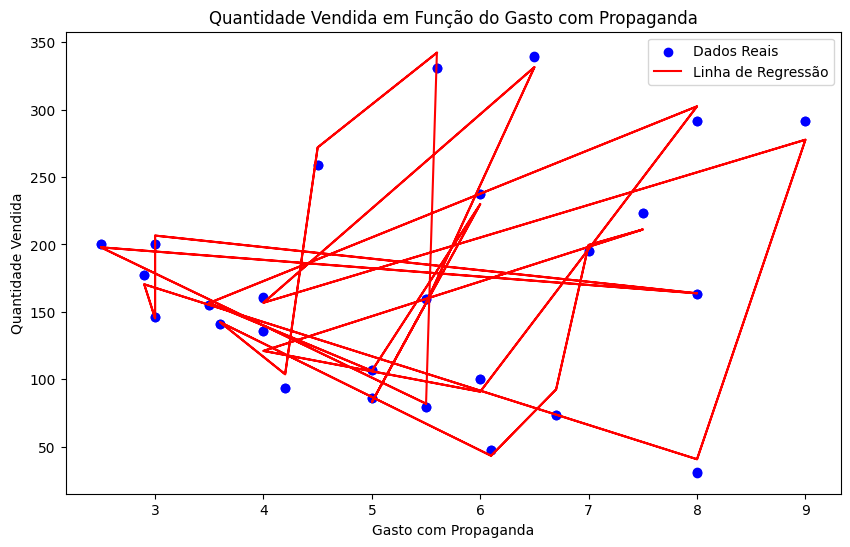

In [23]:
# Visualização dos dados e da linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['gast_prop'], df['qt_venda'], color='blue', label='Dados Reais')
plt.plot(df['gast_prop'], model.predict(df), color='red', label='Linha de Regressão')
plt.xlabel('Gasto com Propaganda')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade Vendida em Função do Gasto com Propaganda')
plt.legend()
plt.show()

`Análise e Conclusão`

Estatísticas Descritivas

As estatísticas descritivas fornecem uma visão geral dos dados, incluindo a média, desvio padrão, valores mínimos e máximos, e quartis. Isso nos ajuda a entender a distribuição dos dados de quantidade vendida, gasto com propaganda, número de contas ativas, número de marcas e número de lojas na região.

Matriz de Correlação
A matriz de correlação mostra a relação entre as variáveis qt_vend, gast_prop, n_cont, n_marc e n_loj. Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente.

Modelo de Regressão Linear
O modelo de regressão linear ajustado (qt_vend ~ gast_prop + n_cont + n_marc + n_loj) é significativo, conforme indicado pelo valor p muito pequeno no teste F da ANOVA. Isso sugere que as variáveis independentes são bons preditores da quantidade vendida.

Coeficientes de Regressão: Os coeficientes de regressão indicam a magnitude e a direção da relação entre cada variável independente e a quantidade vendida.
Intersecção: A intersecção (ou intercepto) é o valor esperado de qt_vend quando todas as variáveis independentes são zero.
R-Múltiplo e R-Quadrado: O R-quadrado indica a proporção da variabilidade em qt_vend que pode ser explicada pelas variáveis independentes. O R-quadrado ajustado ajusta o R-quadrado para o número de preditores no modelo.
ANOVA - Teste F
A tabela ANOVA testa a significância global do modelo. Um valor p pequeno indica que o modelo é significativo.

`Conclusão`

Os resultados indicam que há uma relação linear significativa entre a quantidade vendida e as variáveis gasto com propaganda, número de contas ativas, número de marcas e número de lojas na região. O modelo de regressão linear ajustado é capaz de explicar uma grande parte da variabilidade na quantidade vendida e pode ser usado para fazer previsões razoáveis sobre as vendas futuras. A visualização dos dados e da linha de regressão mostra que o modelo se ajusta bem aos dados, capturando a tendência geral de aumento nas vendas com o aumento do gasto com propaganda e outras variáveis.

